In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

#Dataset creation with sklearn tools (make_blobs)

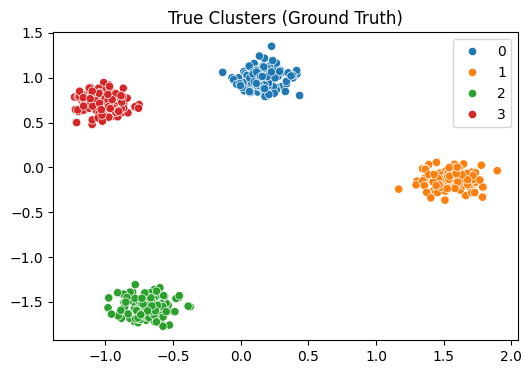

In [2]:
# Create blob-like data with clear clusters. Please note that these are perfect clusters with create.
#So, the clustering structure will be obvious to the algorithms

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the true clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

#Using elbow method to determine the number of cluster

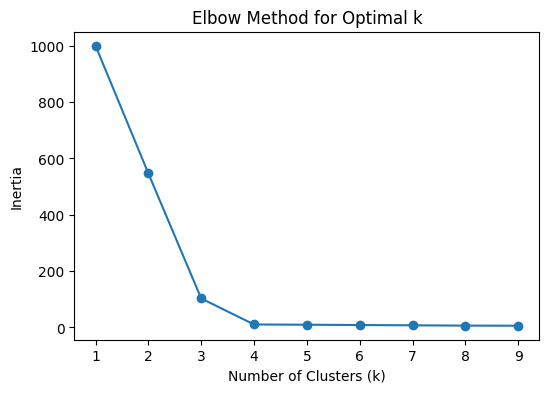

In [3]:
inertia = [] #Inertia is the sum of squared distances from each point to its assigned cluster center.
#inertia is a metric that measures how internally coherent the clusters are


K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#Apply both k-means and DBScan on the same data. Please note that DBSCAN doesn't require the number of clusters, but it asks epsilon and min_samples (min points)

In [4]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Let's visualize both clustering outputs

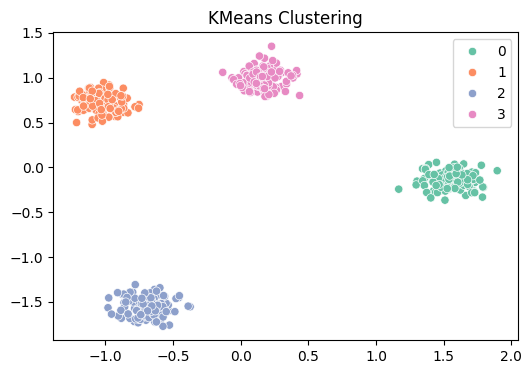

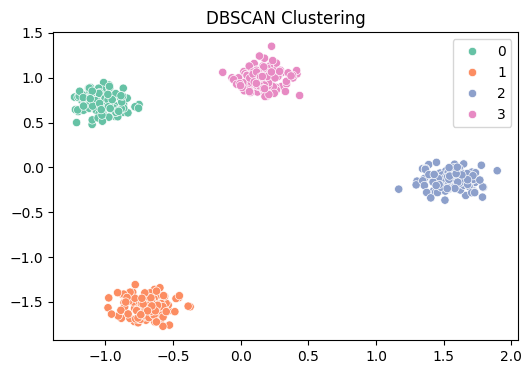

In [5]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

#Adjusted Rand Index calculations

In [6]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 1.0
Adjusted Rand Index (DBSCAN): 1.0


#Can you do the same experiment with iris data?

KMeans 0.432804702527474
DBSCAN 0.4420986685885924


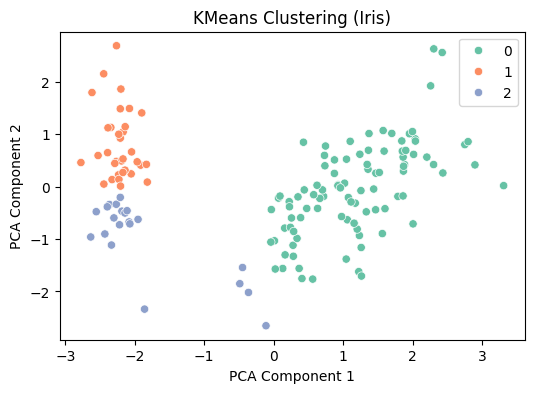

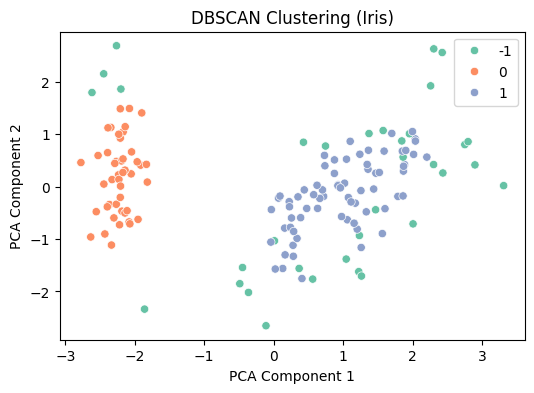

In [11]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
X_iris_scaled = StandardScaler().fit_transform(X_iris)

kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris_labels = kmeans_iris.fit_predict(X_iris_scaled)

dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
dbscan_iris_labels = dbscan_iris.fit_predict(X_iris_scaled)

ari_kmeans_iris = adjusted_rand_score(y_iris, kmeans_iris_labels)
ari_dbscan_iris = adjusted_rand_score(y_iris, dbscan_iris_labels)

print("KMeans", ari_kmeans_iris)
print("DBSCAN", ari_dbscan_iris)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris_scaled)

#KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_iris_labels, palette='Set2')
plt.title("KMeans Clustering (Iris)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_iris_labels, palette='Set2')
plt.title("DBSCAN Clustering (Iris)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
